/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_23968/627435473.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_23968/627435473.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)


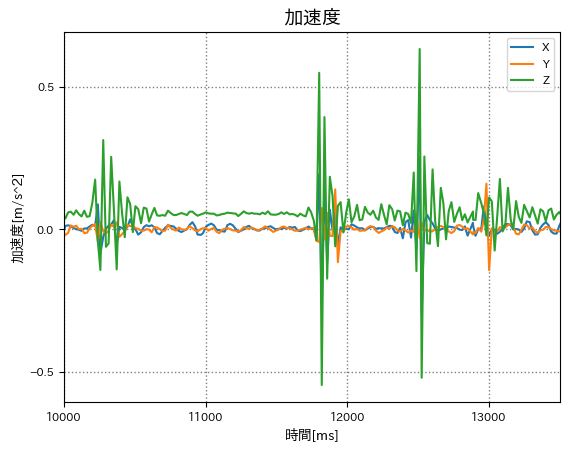

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルのパス
csv_file_path = "./log/log-txyz.csv"

# CSVファイルを読み込む
data = pd.read_csv(csv_file_path)

# 時間、X軸、Y軸、Z軸のデータを取得
time = data['time']
x = data['x']
y = data['y']
z = data['z']

# グラフの描画
fig, ax = plt.subplots()
ax.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)

# X軸、Y軸、Z軸のデータをプロット
ax.plot(time, x, label='X')
ax.plot(time, y, label='Y')
ax.plot(time, z, label='Z')
ax.set_xlim(10000, 13500)

# グラフのタイトル、軸ラベル、凡例を設定
ax.set_title('加速度', fontdict={'size': 14})
ax.set_xlabel('時間[ms]', fontdict={'size': 10})
ax.set_ylabel('加速度[m/s^2]', fontdict={'size': 10})

ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# 凡例を表示
ax.legend(fontsize=8)

# グラフを表示
plt.show()
